Antes de tudo, um aviso importante: Eu não consegui pensar em uma forma de automatizar a realização da fotometria para mais de uma imagem de cada vez, então como o tema de minha pesquisa é Ocultações Estelares, eu tinha decidido utilizar 3 grupos de imagens: 2 imagens antes, 2 imagens durante e 2 imagens após o evento, porém acabei esquecendo de enviar as imagens do computador do OV para o meu computador, de forma que eu não tinha as imagens a serem utilizadas. Com isso, utilizei apenas a primeira e uma das últimas imagens de uma mesma ocultação. Peço desculpas por isso. (Meu código está meio longo hahah). 

In [1]:
import scipy.optimize as opt
import numpy as np
import pylab as pl

import astropy.io.fits as fits

Importando a imagem:

In [2]:
image_full = fits.getdata('occCebrionnes_Olsen_000002.fits').astype(float)

In [3]:
image_full

array([[ 9.,  9., 10., ...,  9.,  9.,  9.],
       [ 9.,  9.,  9., ...,  9.,  9.,  9.],
       [ 9.,  9.,  9., ...,  9.,  9.,  9.],
       ...,
       [ 9.,  9.,  9., ...,  9.,  9.,  9.],
       [ 9.,  9.,  9., ...,  9.,  9.,  9.],
       [ 9.,  9.,  9., ...,  9.,  9.,  9.]])

In [4]:
image_full.shape

(576, 720)

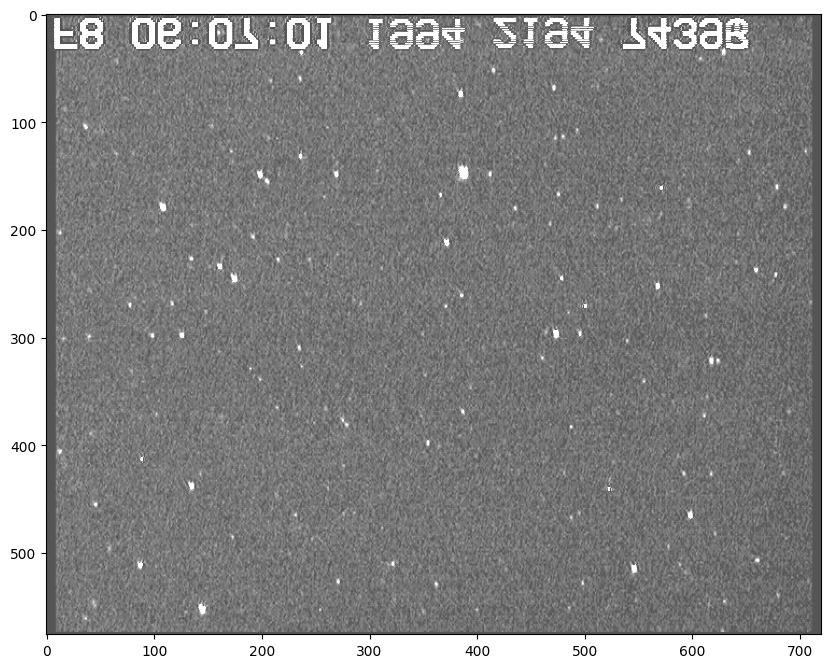

In [5]:
pl.figure(figsize=[10, 10])
pl.imshow(image_full, cmap='gray', vmin=image_full.mean()-30, vmax=image_full.mean()+30)
pl.show()

Começamos fazendo um corte ao redor da estrela que será ocultada, definindo essa como a região de interesse:

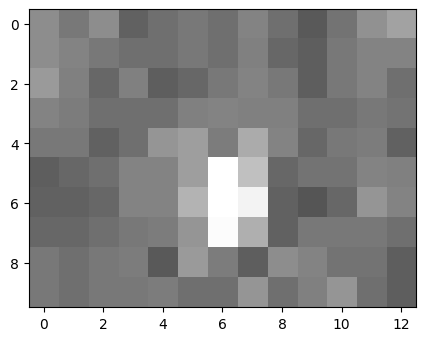

In [6]:
pl.figure(figsize=[5, 5])
pl.imshow(image_full[265:275, 365:378], cmap='gray', 
          vmin=image_full.mean()-30, vmax=image_full.mean()+30)

pl.show()

Agora, podemos definir a imagem, chamada de image, como apenas essa área de interesse, de forma que a fotometria
seja feita de forma mais fácil.

In [7]:
image = image_full[265:275, 365:378] #matriz da imagem da área de interesse

In [8]:
image.shape

(10, 13)

In [9]:
image

array([[22., 17., 22., 12., 15., 17., 15., 20., 15., 10., 16., 23., 27.],
       [22., 20., 17., 15., 15., 17., 15., 19., 13., 11., 17., 20., 20.],
       [25., 19., 13., 19., 11., 13., 17., 20., 17., 11., 17., 20., 15.],
       [20., 18., 15., 15., 15., 19., 20., 19., 19., 15., 15., 17., 16.],
       [17., 17., 12., 15., 24., 26., 18., 29., 20., 13., 17., 18., 12.],
       [11., 13., 15., 20., 20., 26., 51., 34., 13., 16., 16., 20., 19.],
       [12., 12., 13., 20., 20., 31., 73., 46., 12.,  9., 13., 24., 20.],
       [13., 13., 15., 17., 18., 24., 48., 30., 12., 17., 17., 17., 15.],
       [17., 15., 17., 18., 10., 25., 18., 11., 22., 20., 16., 16., 11.],
       [17., 15., 17., 17., 18., 15., 15., 24., 15., 19., 24., 15., 11.]])

Definindo o Fotocentro da estrela alvo usando o método do momento:

In [10]:
#Essa função irá devolver o fotocentro da estrela alvo.
def momento(data):
    
    I_i = np.sum(data, axis=0) #Soma dos pixeis de cada coluna.
    I_j = np.sum(data, axis=1) #Soma dos pixeis de cada linha.
    Ii_mean = np.sum(I_i)/len(I_i) #Média do brilho dos pixeis da coluna.
    Ij_mean = np.sum(I_j)/len(I_j) #Média do brilho dos pixeis da linha.

    x_i = np.arange(data.shape[1])
    y_j = np.arange(data.shape[0])
    mask_i = (I_i - Ii_mean) > 0 #Seleciona apenas os pixeis cujo brilho é maior do que a média da coluna.
    mask_j = (I_j - Ij_mean) > 0 #Seleciona apenas os pixeis cujo brilho é maior do que a média da linha.

    xc = np.sum((I_i - Ii_mean)[mask_i]*x_i[mask_i])/np.sum((I_i - Ii_mean)[mask_i]) #Aqui é realizada a média ponderada da coluna.
    yc = np.sum((I_j - Ij_mean)[mask_j]*y_j[mask_j])/np.sum((I_j - Ij_mean)[mask_j]) #Aqui é realizada a média ponderada da linha.
    return xc, yc


In [11]:
#Podemos, assim, obter o valor exato do fotocentro.

x0, y0 = momento(image)
print('O fotocentro da estrela alvo se localiza em:',x0, y0)

O fotocentro da estrela alvo se localiza em: 6.315001870557427 5.8422436459246265


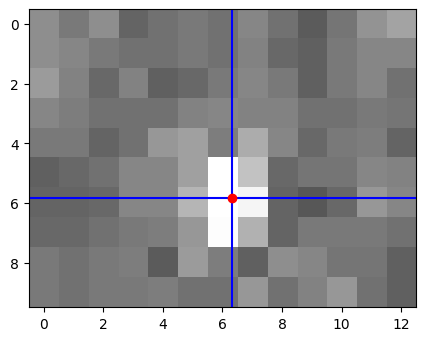

In [12]:
#Plotamos a imagem com o fotocentro sinalizado.
pl.figure(figsize=[5, 5])
pl.imshow(image, cmap='gray', vmin=image.mean()-30, vmax=image.mean()+30)
pl.axhline(y0, color='blue', zorder=1)
pl.axvline(x0, color='blue', zorder=1)
pl.plot(x0, y0, 'ro', zorder=2)

pl.show()

Agora, podemos criar uma máscara com os pixeis que gostaríamos de somar.

In [13]:
#A função meshgrid criará uma grade a partir de duas matrizes.
y = np.arange(image.shape[0])
x = np.arange(image.shape[1])

x, y = np.meshgrid(x, y)

print(x)
print('\n')
print(y)

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12]]


[[0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5 5 5 5 5 5 5]
 [6 6 6 6 6 6 6 6 6 6 6 6 6]
 [7 7 7 7 7 7 7 7 7 7 7 7 7]
 [8 8 8 8 8 8 8 8 8 8 8 8 8]
 [9 9 9 9 9 9 9 9 9 9 9 9 9]]


Como o fundo de céu não pode ser desconsiderado, já que o ruído presente na imagem afeta o resultado ontido na fotometria, precisamos removê-lo o máximo possível. Para isso, definimos um anel ao redor da estrela alvo, desconsiderando o brilho da mesma.:

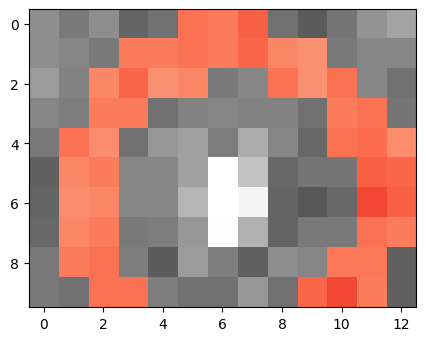

In [14]:
outer_ring = 6
inner_ring = 4

abertura = 4

#Criando a máscara.
mask = np.sqrt((x - x0)**2 + (y - y0)**2) < abertura #Distância até o centro que seja menor do que a abertura escolhida acima.

#Escolhendo uma área do céu que não tenha interferência do brilho da estrela alvo.
mask_sky = ((np.sqrt((x - x0)**2 + (y - y0)**2) < outer_ring) * 
            (np.sqrt((x - x0)**2 + (y - y0)**2) > inner_ring)) 

#Algumas especificações que ajudarão na visualização do plot:
image_sky = np.copy(image) 
image_copy = np.copy(image) 
image_sky[~mask_sky] = np.nan  
image_copy[~mask] = np.nan  

pl.figure(figsize=[5, 5])
pl.imshow(image, cmap='gray', vmin=image.mean()-30, vmax=image.mean()+30)
pl.imshow(image_sky, cmap='Reds', alpha=1.0, vmin=image.mean()-30, vmax=image.mean()+30)

pl.show()

Text(0.5, 0, 'Fuxo [contagens]')

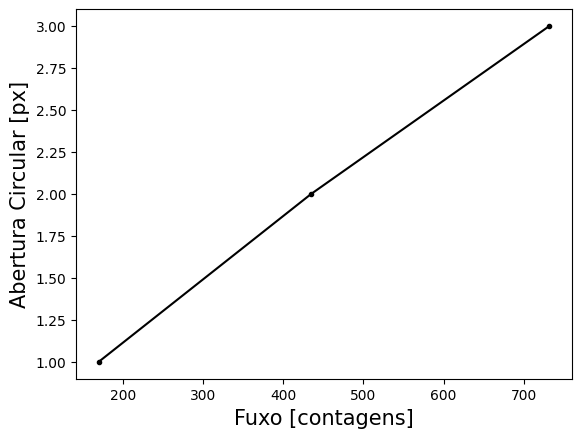

In [15]:
#Aqui, podemos ver que aumentando a abertura do anel, aumentamos também o fluxo (como o esperado).
fluxos = np.array([])
abertura = np.arange(1,4)

#Definimos os valores de abertura
for i in abertura:
    mask = np.sqrt((x - x0)**2 + (y - y0)**2) < i
    fluxos = np.append(fluxos, np.sum(image[mask]))
    
    
pl.plot(fluxos, abertura, 'k.-')
pl.ylabel('Abertura Circular [px]', fontsize=15)
pl.xlabel('Fuxo [contagens]', fontsize=15)


In [16]:
#Aqui, estamos removendo os outliers para a obtenção de melhores resultados.
flux_sky = np.sum(image[mask_sky])
print('Fluxo do céu:', flux_sky)

npix_sky = len(image[mask_sky])
print('Número de pixeis:', npix_sky)
print('\n')
print('Distribuição do Fundo do céu: {:.2f} +/- {:.2f}'.format(image[mask_sky].mean(), 
                                                               image[mask_sky].std()))

Fluxo do céu: 748.0
Número de pixeis: 47


Distribuição do Fundo do céu: 15.91 +/- 2.97


Agora, podemos calcular o S/N de forma mais eficiente :D

Melhor abertura: 1.5999999999999999 px
S/N máximo: 11.49692567693492


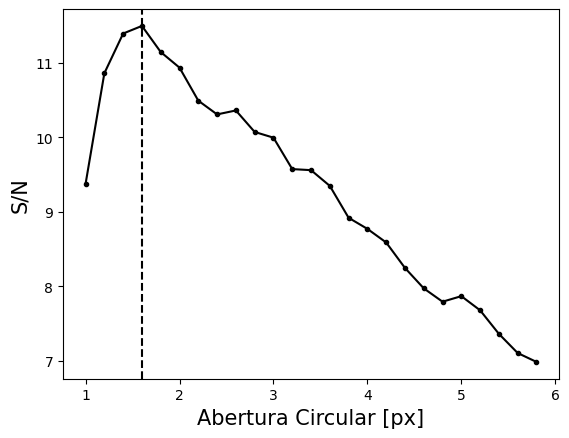

In [17]:
#Aqui, estamos procurando qual a melhor abertura para a determinação do S/N, de  forma que este fique maximizado.
fluxos = np.array([])
npixs = np.array([])

abertura = np.arange(1,6,0.2) #Definimos aqui os possíveis valores de abertura
for i in abertura:
    mask = np.sqrt((x - x0)**2 + (y - y0)**2) < i
    fluxos = np.append(fluxos, np.sum(image[mask]))
    npixs  = np.append(npixs, len(image[mask]))

    
fluxos_new = fluxos - npixs*image[mask_sky].mean() #Retiramos aqui a contribuição do fundo de céu.
snr = fluxos_new/np.sqrt(fluxos_new + npixs*image[mask_sky].mean())



print('Melhor abertura: {:02} px'.format(abertura[snr.argmax()]))
print ('S/N máximo:',snr.max())
pl.plot(abertura, snr, 'k.-')
pl.xlabel('Abertura Circular [px]', fontsize=15)
pl.ylabel('S/N', fontsize=15)
pl.axvline(abertura[snr.argmax()], color='k', ls='--')
pl.show()


In [18]:
abertura = 1.6 #abertura que foi definida como a melhor

mask = np.sqrt((x - x0)**2 + (y - y0)**2) < abertura

image_copy = np.copy(image) #Ilustração
image_copy[~mask] = np.nan  #Ilustração

fluxo=np.sum(image[mask])



Agora podemos, finalmente, obter o fluxo da estrela com a melhor abertura possível

O fluxo da estrela alvo é: 339.0


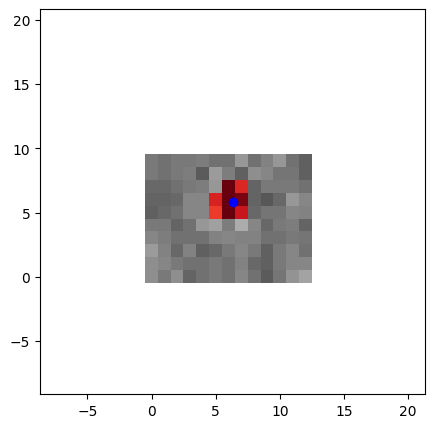

In [19]:
print('O fluxo da estrela alvo é:',fluxo) #determinamos o fluxo da estrela aqui

pl.figure(figsize=[5, 5])
pl.imshow(image, cmap='gray', vmin=image.mean()-30, vmax=image.mean()+30)
pl.imshow(image_copy, cmap='Reds', alpha=1.0, vmin=image.mean()-30, vmax=image.mean()+30)
pl.plot(x0, y0, 'bo')
pl.xlim(x0-15, x0+15)
pl.ylim(y0-15, y0+15)
pl.show()

Agora, precisamos realizar novamente a fotometria, mas agora utilizando uma outra estrela, que servirá como calibradora para compararmos o fluxo de ambas as estrelas (essa, e a estrela alvo).

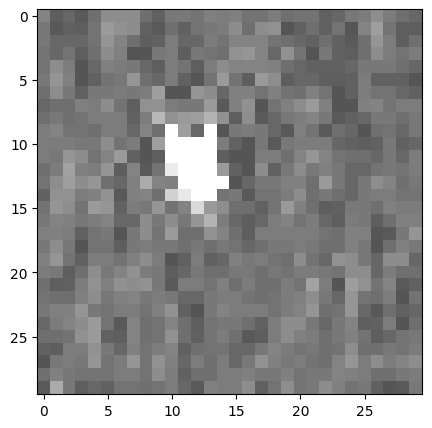

In [24]:
#Fazemos outro corte na imagem inicial, agora tendo como área de interesse a estrela calibradora.
pl.figure(figsize=[5, 5])
pl.imshow(image_full[200:230, 360:390], cmap='gray', 
          vmin=image_full.mean()-30, vmax=image_full.mean()+30)

pl.show()

In [25]:
#Definimos image1 como a área de interesse que engloba a estrela calibradora.
image1 = image_full[200:230, 360:390]

In [26]:
image1.shape

(30, 30)

In [27]:
image

array([[22., 17., 22., 12., 15., 17., 15., 20., 15., 10., 16., 23., 27.],
       [22., 20., 17., 15., 15., 17., 15., 19., 13., 11., 17., 20., 20.],
       [25., 19., 13., 19., 11., 13., 17., 20., 17., 11., 17., 20., 15.],
       [20., 18., 15., 15., 15., 19., 20., 19., 19., 15., 15., 17., 16.],
       [17., 17., 12., 15., 24., 26., 18., 29., 20., 13., 17., 18., 12.],
       [11., 13., 15., 20., 20., 26., 51., 34., 13., 16., 16., 20., 19.],
       [12., 12., 13., 20., 20., 31., 73., 46., 12.,  9., 13., 24., 20.],
       [13., 13., 15., 17., 18., 24., 48., 30., 12., 17., 17., 17., 15.],
       [17., 15., 17., 18., 10., 25., 18., 11., 22., 20., 16., 16., 11.],
       [17., 15., 17., 17., 18., 15., 15., 24., 15., 19., 24., 15., 11.]])

In [28]:
#Obtemos aqui o fotocentro da estrela calibradora usando o método do momento, assim como foi feito com a estrela alvo.
def momento(data):
    
    I_i = np.sum(data, axis=0) #Soma dos pixeis de cada coluna.
    I_j = np.sum(data, axis=1) #Soma dos pixeis de cada linha.
    Ii_mean = np.sum(I_i)/len(I_i) #Média do brilho dos pixeis da coluna.
    Ij_mean = np.sum(I_j)/len(I_j) #Média do brilho dos pixeis da linha.

    x_i = np.arange(data.shape[1])
    y_j = np.arange(data.shape[0])
    mask_i = (I_i - Ii_mean) > 0 #Seleciona apenas os pixeis cujo brilho é maior do que a média da coluna.
    mask_j = (I_j - Ij_mean) > 0 #Seleciona apenas os pixeis cujo brilho é maior do que a média da linha.

    xc = np.sum((I_i - Ii_mean)[mask_i]*x_i[mask_i])/np.sum((I_i - Ii_mean)[mask_i]) #Aqui é realizada a média ponderada da coluna.
    yc = np.sum((I_j - Ij_mean)[mask_j]*y_j[mask_j])/np.sum((I_j - Ij_mean)[mask_j]) #Aqui é realizada a média ponderada da linha.
    return xc, yc


In [29]:
x0, y0 = momento(image1)
print(x0, y0)

11.80441413960165 11.622747529548537


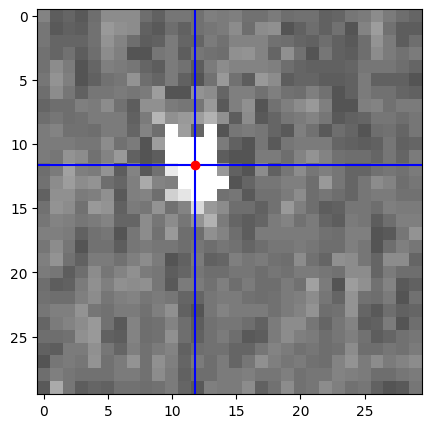

In [30]:
#Estrela calibradora com fotocentro sinalizado.
pl.figure(figsize=[5, 5])
pl.imshow(image1, cmap='gray', vmin=image1.mean()-30, vmax=image1.mean()+30)
pl.axhline(y0, color='blue', zorder=1)
pl.axvline(x0, color='blue', zorder=1)
pl.plot(x0, y0, 'ro', zorder=2)

pl.show()

In [31]:
#A função meshgrid criará uma grade a partir de duas matrizes.
y = np.arange(image1.shape[0])
x = np.arange(image1.shape[1])

x, y = np.meshgrid(x, y)

print(x)
print('\n')
print(y)

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 

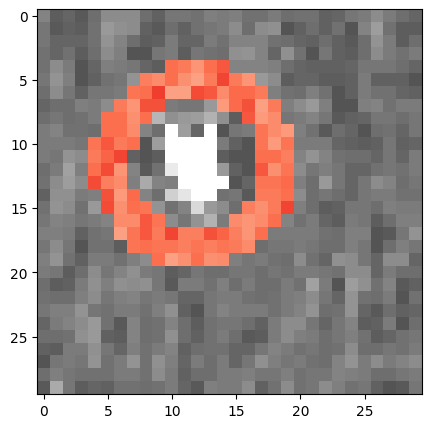

In [32]:
#Novamente, criamos uma máscara.
outer_ring = 8
inner_ring = 5

abertura = 4

#Criando a máscara.
mask = np.sqrt((x - x0)**2 + (y - y0)**2) < abertura #Distância até o centro que seja menor do que a abertura escolhida acima.

#escolhendo uma área do céu que não tenha interferência do brilho da estrela alvo.
mask_sky = ((np.sqrt((x - x0)**2 + (y - y0)**2) < outer_ring) * 
            (np.sqrt((x - x0)**2 + (y - y0)**2) > inner_ring)) 

#Algumas especificações que ajudarão na visualização do plot:
image1_sky = np.copy(image1) 
image1_copy = np.copy(image1) 
image1_sky[~mask_sky] = np.nan  
image1_copy[~mask] = np.nan  

pl.figure(figsize=[5, 5])
pl.imshow(image1, cmap='gray', vmin=image1.mean()-30, vmax=image1.mean()+30)
pl.imshow(image1_sky, cmap='Reds', alpha=1.0, vmin=image1.mean()-30, vmax=image1.mean()+30)


pl.show()

Text(0.5, 0, 'Fluxo [contagens]')

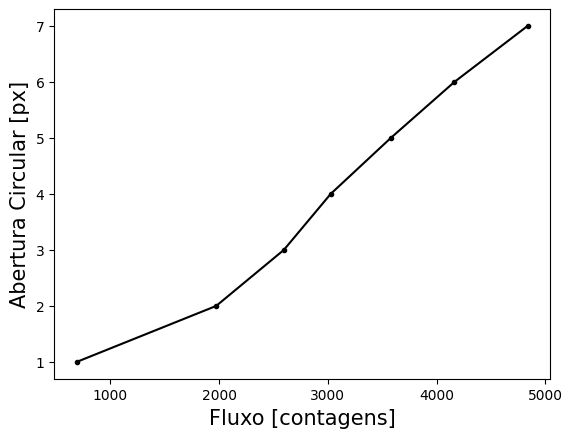

In [33]:
#Podemos observar aqui que quanto maior a abertura, maior será o fluxo.
fluxos = np.array([])
abertura = np.arange(1,8)

for i in abertura:
    mask = np.sqrt((x - x0)**2 + (y - y0)**2) < i
    fluxos = np.append(fluxos, np.sum(image1[mask]))
    
pl.plot(fluxos, abertura, 'k.-')
pl.ylabel('Abertura Circular [px]', fontsize=15)
pl.xlabel('Fluxo [contagens]', fontsize=15)


In [34]:
#Aqui, estamos removendo os outliers para a obtenção de melhores resultados.
flux_sky = np.sum(image1[mask_sky])
print('Fluxo do céu:', flux_sky)

npix_sky = len(image1[mask_sky])
print('Número de pixeis:', npix_sky)
print('\n')
print('Distribuição do Fundo do céu: {:.2f} +/- {:.2f}'.format(image1[mask_sky].mean(), 
                                                               image1[mask_sky].std()))

Fluxo do céu: 2011.0
Número de pixeis: 122


Distribuição do Fundo do céu: 16.48 +/- 4.22


Melhor abertura: 03 px
S/N máximo: 41.55728171019945


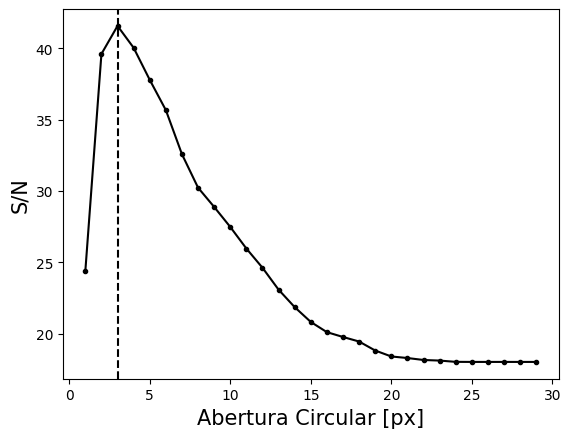

In [35]:
#Aqui, estamos procurando qual a melhor abertura para a determinação do S/N, de  forma que este fique maximizado.
fluxos = np.array([])
npixs = np.array([])

abertura = np.arange(1,30)
for i in abertura:
    mask = np.sqrt((x - x0)**2 + (y - y0)**2) < i
    fluxos = np.append(fluxos, np.sum(image1[mask]))
    npixs  = np.append(npixs, len(image1[mask]))

    
fluxos_new = fluxos - npixs*image1[mask_sky].mean()
snr = fluxos_new/np.sqrt(fluxos_new + npixs*image1[mask_sky].mean())

print('Melhor abertura: {:02} px'.format(abertura[snr.argmax()]))
print ('S/N máximo:',snr.max())
pl.plot(abertura, snr, 'k.-')
pl.xlabel('Abertura Circular [px]', fontsize=15)
pl.ylabel('S/N', fontsize=15)
pl.axvline(abertura[snr.argmax()], color='k', ls='--')
pl.show()

O fluxo da estrela calibradora é: 2595.0


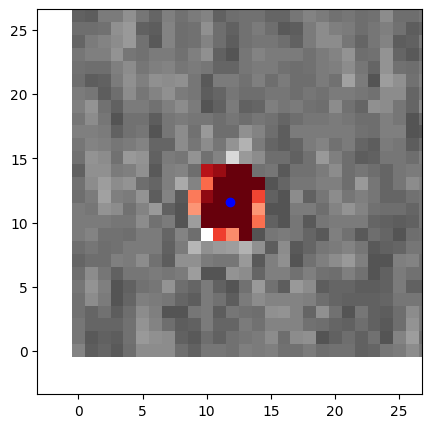

In [37]:
abertura = 3 #Utilizando a melhor abertura definida anteriormente.

mask = np.sqrt((x - x0)**2 + (y - y0)**2) < abertura

image1_copy = np.copy(image1) # Puramente para ilustração
image1_copy[~mask] = np.nan  # Puramente para ilustração

fluxo=np.sum(image1[mask])

print('O fluxo da estrela calibradora é:',fluxo) #determinamos o fluxo da estrela aqui

pl.figure(figsize=[5, 5])
pl.imshow(image1, cmap='gray', vmin=image1.mean()-30, vmax=image1.mean()+30)
pl.imshow(image1_copy, cmap='Reds', alpha=1.0, vmin=image1.mean()-30, vmax=image1.mean()+30)
pl.plot(x0, y0, 'bo')
pl.xlim(x0-15, x0+15)
pl.ylim(y0-15, y0+15)
pl.show()

Realizaremos a Fotometria em uma outra imagem da mesma ocultação a seguir.

In [38]:
image2_full = fits.getdata('occCebrionnes_Olsen_002931.fits').astype(float)

In [39]:
image2_full

array([[9., 9., 9., ..., 9., 9., 9.],
       [9., 9., 9., ..., 9., 9., 9.],
       [9., 9., 9., ..., 9., 9., 9.],
       ...,
       [9., 9., 9., ..., 9., 9., 9.],
       [9., 9., 9., ..., 9., 9., 9.],
       [9., 9., 9., ..., 9., 9., 9.]])

In [40]:
image2_full.shape

(576, 720)

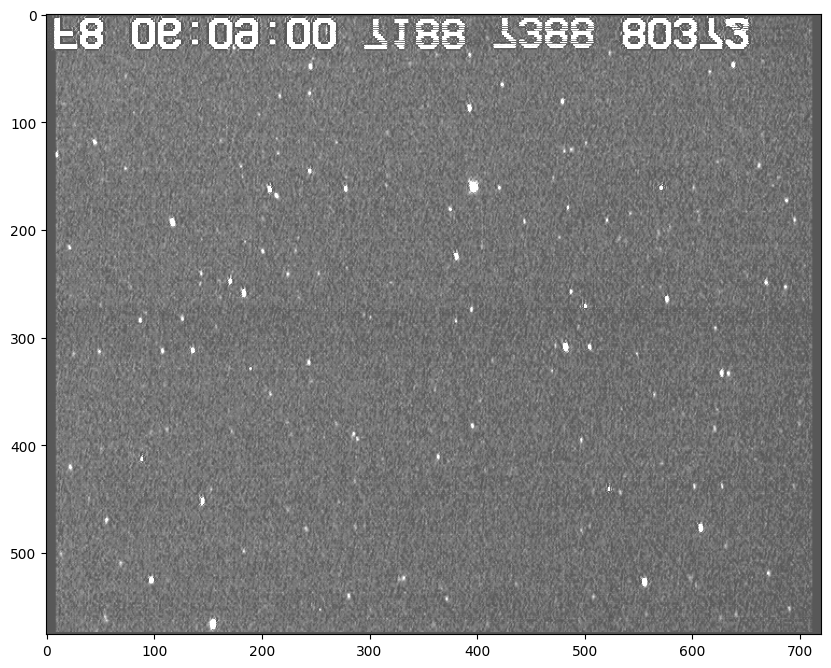

In [41]:
pl.figure(figsize=[10, 10])
pl.imshow(image2_full, cmap='gray', vmin=image2_full.mean()-30, vmax=image2_full.mean()+30)
pl.show()

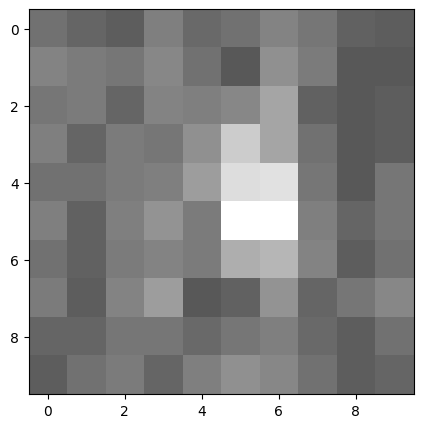

In [42]:
#Cortando a imagem com a área de interesse englobando apenas a estrela a ser ocultada.
pl.figure(figsize=[5, 5])
pl.imshow(image2_full[280:290, 375:385], cmap='gray', 
          vmin=image2_full.mean()-30, vmax=image2_full.mean()+30)

pl.show()

In [48]:
image2 = image2_full[280:290, 375:385] #matriz da imagem da área de interesse

In [49]:
image2.shape

(10, 10)

In [50]:
image2

array([[15., 12., 10., 18., 13., 15., 19., 16., 11., 10.],
       [19., 17., 16., 20., 15.,  9., 22., 17.,  9.,  9.],
       [16., 17., 12., 19., 18., 20., 27., 11.,  9., 10.],
       [18., 12., 17., 16., 22., 36., 27., 15.,  9., 10.],
       [15., 15., 17., 18., 25., 40., 41., 16.,  9., 16.],
       [18., 11., 18., 23., 17., 51., 52., 18., 12., 16.],
       [15., 11., 17., 19., 17., 29., 31., 19., 10., 15.],
       [17., 10., 19., 25.,  9., 11., 23., 12., 16., 20.],
       [12., 12., 16., 16., 13., 16., 18., 13., 10., 15.],
       [10., 15., 17., 12., 18., 22., 20., 15., 10., 12.]])

In [54]:
#Essa função irá devolver o fotocentro da estrela alvo.
def momento(data):
    
    I_i = np.sum(data, axis=0) #Soma dos pixeis de cada coluna.
    I_j = np.sum(data, axis=1) #Soma dos pixeis de cada linha.
    Ii_mean = np.sum(I_i)/len(I_i) #Média do brilho dos pixeis da coluna.
    Ij_mean = np.sum(I_j)/len(I_j) #Média do brilho dos pixeis da linha.

    x_i = np.arange(data.shape[1])
    y_j = np.arange(data.shape[0])
    mask_i = (I_i - Ii_mean) > 0 #Seleciona apenas os pixeis cujo brilho é maior do que a média da coluna.
    mask_j = (I_j - Ij_mean) > 0 #Seleciona apenas os pixeis cujo brilho é maior do que a média da linha.

    xc = np.sum((I_i - Ii_mean)[mask_i]*x_i[mask_i])/np.sum((I_i - Ii_mean)[mask_i]) #Aqui é realizada a média ponderada da coluna.
    yc = np.sum((I_j - Ij_mean)[mask_j]*y_j[mask_j])/np.sum((I_j - Ij_mean)[mask_j]) #Aqui é realizada a média ponderada da linha.
    return xc, yc


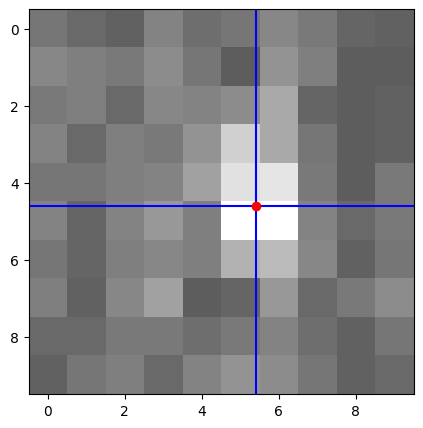

In [55]:
#Plotamos a imagem com o fotocentro sinalizado.
pl.figure(figsize=[5, 5])
pl.imshow(image2, cmap='gray', vmin=image2.mean()-30, vmax=image2.mean()+30)
pl.axhline(y0, color='blue', zorder=1)
pl.axvline(x0, color='blue', zorder=1)
pl.plot(x0, y0, 'ro', zorder=2)

pl.show()

In [56]:
#Podemos, assim, obter o valor exato do fotocentro.

x0, y0 = momento(image2)
print('O fotocentro da imagem se localiza em:',x0, y0)

O fotocentro da imagem se localiza em: 5.3997995991983965 4.60731319554849


In [57]:
#A função meshgrid criará uma grade a partir de duas matrizes.
y = np.arange(image2.shape[0])
x = np.arange(image2.shape[1])

x, y = np.meshgrid(x, y)

print(x)
print('\n')
print(y)

[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]


[[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5 5 5 5]
 [6 6 6 6 6 6 6 6 6 6]
 [7 7 7 7 7 7 7 7 7 7]
 [8 8 8 8 8 8 8 8 8 8]
 [9 9 9 9 9 9 9 9 9 9]]


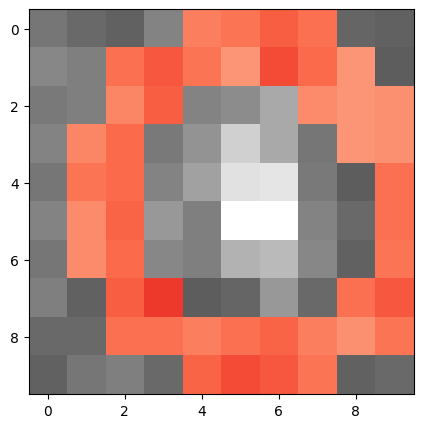

In [58]:
#Criamos aqui a máscara para a determinação do anel.
outer_ring = 5
inner_ring = 3

abertura = 4

#Criando a máscara.
mask = np.sqrt((x - x0)**2 + (y - y0)**2) < abertura #Distância até o centro que seja menor do que a abertura escolhida acima.

#escolhendo uma área do céu que não tenha interferência do brilho da estrela alvo.
mask_sky = ((np.sqrt((x - x0)**2 + (y - y0)**2) < outer_ring) * 
            (np.sqrt((x - x0)**2 + (y - y0)**2) > inner_ring)) 

#Algumas especificações que ajudarão na visualização do plot:
image2_sky = np.copy(image2) 
image2_copy = np.copy(image2) 
image2_sky[~mask_sky] = np.nan  
image2_copy[~mask] = np.nan  

pl.figure(figsize=[5, 5])
pl.imshow(image2, cmap='gray', vmin=image2.mean()-30, vmax=image2.mean()+30)
pl.imshow(image2_sky, cmap='Reds', alpha=1.0, vmin=image2.mean()-30, vmax=image2.mean()+30)
#pl.imshow(image2_copy, cmap='Blues', alpha=1.0, vmin=image2.mean()-30, vmax=image2.mean()+30)

pl.show()

Text(0.5, 0, 'Fuxo [contagens]')

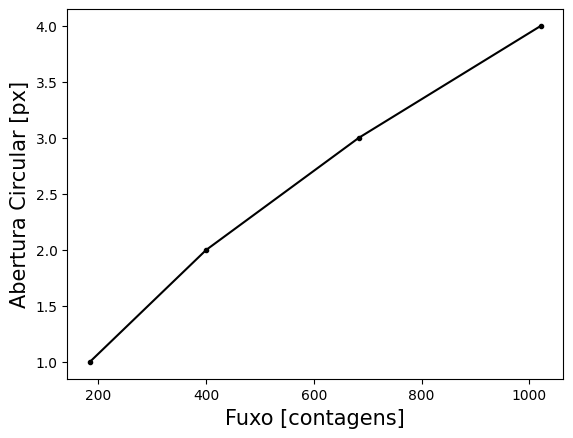

In [59]:
#Aqui, podemos ver que aumentando a abertura do anel, aumentamos também o fluxo (como o esperado).
fluxos = np.array([])
abertura = np.arange(1,5)

#Definimos os valores de abertura
for i in abertura:
    mask = np.sqrt((x - x0)**2 + (y - y0)**2) < i
    fluxos = np.append(fluxos, np.sum(image2[mask]))
    
    
pl.plot(fluxos, abertura, 'k.-')
pl.ylabel('Abertura Circular [px]', fontsize=15)
pl.xlabel('Fuxo [contagens]', fontsize=15)


In [60]:
#Aqui, estamos removendo os outliers para a obtenção de melhores resultados.
flux_sky = np.sum(image2[mask_sky])
print('Fluxo do céu:', flux_sky)

npix_sky = len(image2[mask_sky])
print('Número de pixeis:', npix_sky)
print('\n')
print('Distribuição do Fundo do céu: {:.2f} +/- {:.2f}'.format(image2[mask_sky].mean(), 
                                                               image2[mask_sky].std()))

Fluxo do céu: 688.0
Número de pixeis: 45


Distribuição do Fundo do céu: 15.29 +/- 3.84


Melhor abertura: 1.7999999999999998 px
S/N máximo: 10.195677053404234


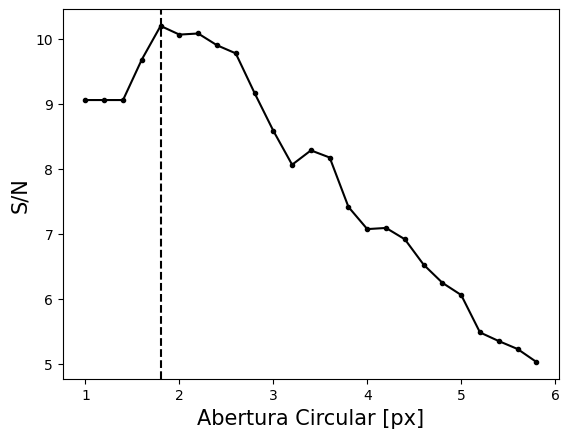

In [61]:
#Aqui, estamos procurando qual a melhor abertura para a determinação do S/N, de  forma que este fique maximizado.
fluxos = np.array([])
npixs = np.array([])

abertura = np.arange(1,6,0.2) #Definimos aqui os possíveis valores de abertura
for i in abertura:
    mask = np.sqrt((x - x0)**2 + (y - y0)**2) < i
    fluxos = np.append(fluxos, np.sum(image2[mask]))
    npixs  = np.append(npixs, len(image2[mask]))

    
fluxos_new = fluxos - npixs*image2[mask_sky].mean() #Retiramos aqui a contribuição do fundo de céu.
snr = fluxos_new/np.sqrt(fluxos_new + npixs*image2[mask_sky].mean())



print('Melhor abertura: {:02} px'.format(abertura[snr.argmax()]))
print ('S/N máximo:',snr.max())
pl.plot(abertura, snr, 'k.-')
pl.xlabel('Abertura Circular [px]', fontsize=15)
pl.ylabel('S/N', fontsize=15)
pl.axvline(abertura[snr.argmax()], color='k', ls='--')
pl.show()

O fluxo da estrela alvo é: 383.0


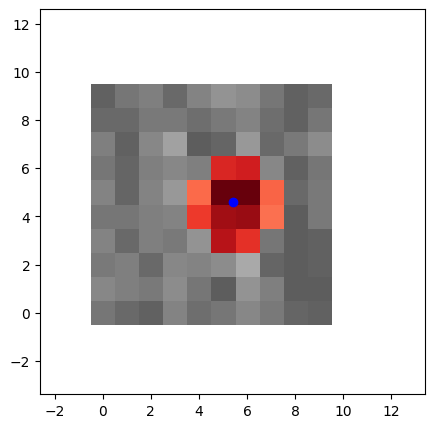

In [64]:
abertura = 1.8 #Utilizamos a melhor abertura.

mask = np.sqrt((x - x0)**2 + (y - y0)**2) < abertura

image2_copy = np.copy(image2) # Puramente para ilustração
image2_copy[~mask] = np.nan  # Puramente para ilustração

fluxo=np.sum(image2[mask])

print('O fluxo da estrela alvo é:',fluxo) #determinamos o fluxo da estrela aqui

pl.figure(figsize=[5, 5])
pl.imshow(image2, cmap='gray', vmin=image2.mean()-30, vmax=image2.mean()+30)
pl.imshow(image2_copy, cmap='Reds', alpha=1.0, vmin=image2.mean()-30, vmax=image2.mean()+30)
pl.plot(x0, y0, 'bo')
pl.xlim(x0-8, x0+8)
pl.ylim(y0-8, y0+8)
pl.show()

Novamente, realizando a fotometria com a estrela calibradora da imagem.

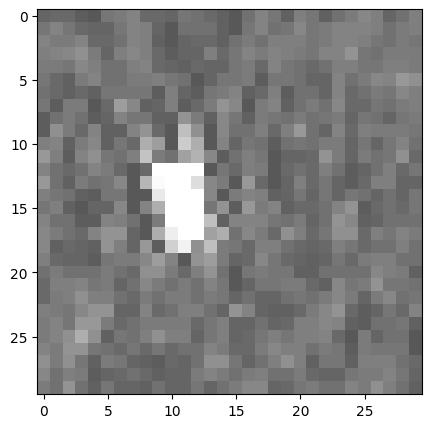

In [66]:
#Fazemos outro corte na imagem inicial, agora tendo como área de interesse a estrela calibradora.
pl.figure(figsize=[5, 5])
pl.imshow(image2_full[210:240, 370:400], cmap='gray', 
          vmin=image2_full.mean()-30, vmax=image2_full.mean()+30)

pl.show()

In [67]:
image3 = image2_full[210:240, 370:400] #matriz da imagem da área de interesse

In [68]:
image3.shape

(30, 30)

In [69]:
image3

array([[ 12.,  13.,  13.,  10.,   9.,  16.,  17.,  19.,  13.,  13.,  12.,
         16.,  15.,  13.,  11.,   9.,  15.,  19.,  16.,  11.,  18.,  16.,
         11.,  15.,  17.,  20.,  18.,  12.,  15.,  18.],
       [ 16.,  19.,  16.,  13.,  12.,  12.,  16.,  19.,  18.,  12.,   9.,
         15.,  15.,  15.,  11.,   9.,  16.,  19.,  15.,  16.,  20.,  16.,
         17.,  19.,  19.,  19.,  18.,  15.,  17.,  18.],
       [ 19.,  17.,  17.,  19.,  13.,  13.,  15.,  19.,  18.,  11.,   9.,
         12.,  13.,  13.,  11.,  15.,  17.,  15.,  18.,  18.,  18.,  16.,
         17.,  19.,  19.,  18.,  16.,  15.,  17.,  16.],
       [ 18.,  19.,  20.,  22.,  17.,  12.,  18.,  20.,  18.,  13.,  10.,
         12.,  12.,  18.,  13.,  16.,  19.,  17.,  19.,  18.,  17.,  16.,
         19.,  19.,  23.,  16.,  15.,  17.,  17.,  17.],
       [ 17.,  17.,  16.,  20.,  18.,  15.,  15.,  18.,  19.,  13.,  12.,
         11.,  13.,  12.,  12.,  16.,  17.,  13.,  19.,  16.,  15.,  13.,
         15.,  18.,  18.,  16., 

In [70]:
#Essa função irá devolver o fotocentro da estrela calibradora.
def momento(data):
    
    I_i = np.sum(data, axis=0) #Soma dos pixeis de cada coluna.
    I_j = np.sum(data, axis=1) #Soma dos pixeis de cada linha.
    Ii_mean = np.sum(I_i)/len(I_i) #Média do brilho dos pixeis da coluna.
    Ij_mean = np.sum(I_j)/len(I_j) #Média do brilho dos pixeis da linha.

    x_i = np.arange(data.shape[1])
    y_j = np.arange(data.shape[0])
    mask_i = (I_i - Ii_mean) > 0 #Seleciona apenas os pixeis cujo brilho é maior do que a média da coluna.
    mask_j = (I_j - Ij_mean) > 0 #Seleciona apenas os pixeis cujo brilho é maior do que a média da linha.

    xc = np.sum((I_i - Ii_mean)[mask_i]*x_i[mask_i])/np.sum((I_i - Ii_mean)[mask_i]) #Aqui é realizada a média ponderada da coluna.
    yc = np.sum((I_j - Ij_mean)[mask_j]*y_j[mask_j])/np.sum((I_j - Ij_mean)[mask_j]) #Aqui é realizada a média ponderada da linha.
    return xc, yc

In [71]:
#Podemos, assim, obter o valor exato do fotocentro.

x0, y0 = momento(image3)
print('O fotocentro da imagem se localiza em:',x0, y0)

O fotocentro da imagem se localiza em: 10.88049940546968 14.451100244498779


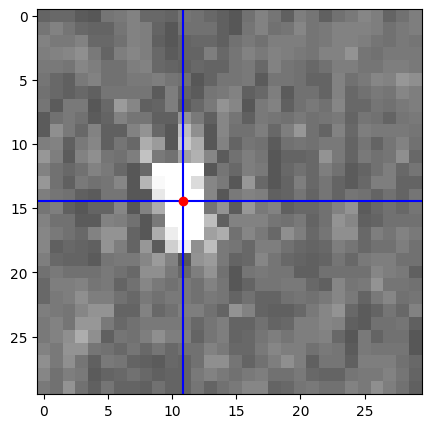

In [72]:
#Plotamos a imagem com o fotocentro sinalizado.
pl.figure(figsize=[5, 5])
pl.imshow(image3, cmap='gray', vmin=image3.mean()-30, vmax=image3.mean()+30)
pl.axhline(y0, color='blue', zorder=1)
pl.axvline(x0, color='blue', zorder=1)
pl.plot(x0, y0, 'ro', zorder=2)

pl.show()

In [73]:
#A função meshgrid criará uma grade a partir de duas matrizes.
y = np.arange(image3.shape[0])
x = np.arange(image3.shape[1])

x, y = np.meshgrid(x, y)

print(x)
print('\n')
print(y)

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 

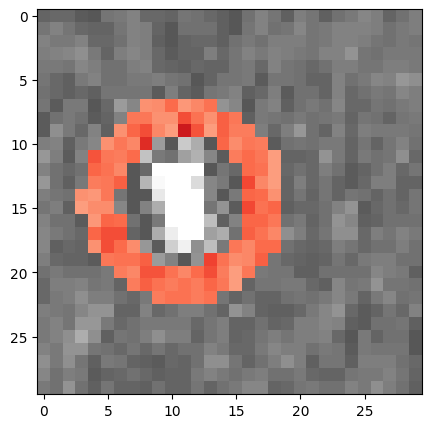

In [74]:
#Determinando o anel ao redor da estrela.
outer_ring = 8
inner_ring = 5

abertura = 5

#Criando a máscara.
mask = np.sqrt((x - x0)**2 + (y - y0)**2) < abertura #Distância até o centro que seja menor do que a abertura escolhida acima.

#escolhendo uma área do céu que não tenha interferência do brilho da estrela alvo.
mask_sky = ((np.sqrt((x - x0)**2 + (y - y0)**2) < outer_ring) * 
            (np.sqrt((x - x0)**2 + (y - y0)**2) > inner_ring)) 

#Algumas especificações que ajudarão na visualização do plot:
image3_sky = np.copy(image3) 
image3_copy = np.copy(image3) 
image3_sky[~mask_sky] = np.nan  
image3_copy[~mask] = np.nan  

pl.figure(figsize=[5, 5])
pl.imshow(image3, cmap='gray', vmin=image3.mean()-30, vmax=image3.mean()+30)
pl.imshow(image3_sky, cmap='Reds', alpha=1.0, vmin=image3.mean()-30, vmax=image3.mean()+30)
pl.show()

Text(0.5, 0, 'Fuxo [contagens]')

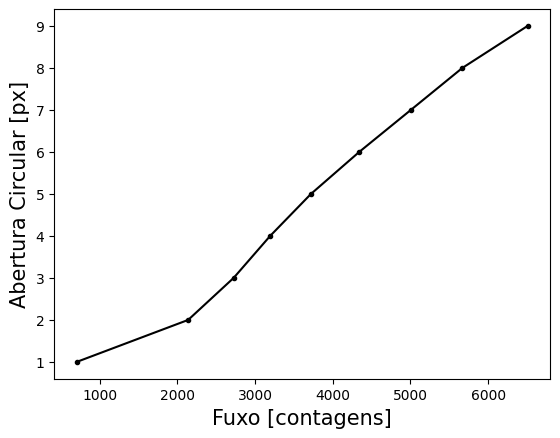

In [75]:
#Aqui, podemos ver que aumentando a abertura do anel, aumentamos também o fluxo (como o esperado).
fluxos = np.array([])
abertura = np.arange(1,10)

#Definimos os valores de abertura
for i in abertura:
    mask = np.sqrt((x - x0)**2 + (y - y0)**2) < i
    fluxos = np.append(fluxos, np.sum(image3[mask]))
    
    
pl.plot(fluxos, abertura, 'k.-')
pl.ylabel('Abertura Circular [px]', fontsize=15)
pl.xlabel('Fuxo [contagens]', fontsize=15)


In [76]:
#Aqui, estamos removendo os outliers para a obtenção de melhores resultados.
flux_sky = np.sum(image3[mask_sky])
print('Fluxo do céu:', flux_sky)

npix_sky = len(image3[mask_sky])
print('Número de pixeis:', npix_sky)
print('\n')
print('Distribuição do Fundo do céu: {:.2f} +/- {:.2f}'.format(image3[mask_sky].mean(), 
                                                               image3[mask_sky].std()))

Fluxo do céu: 1948.0
Número de pixeis: 120


Distribuição do Fundo do céu: 16.23 +/- 4.36


Melhor abertura: 2.8 px
S/N máximo: 43.80545554099725


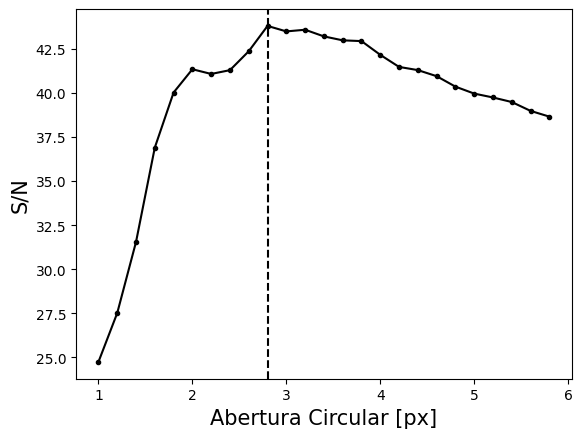

In [77]:
#Procurando qual a melhor abertura para a determinação do S/N, de  forma que este fique maximizado.
fluxos = np.array([])
npixs = np.array([])

abertura = np.arange(1,6,0.2) #Definimos aqui os possíveis valores de abertura
for i in abertura:
    mask = np.sqrt((x - x0)**2 + (y - y0)**2) < i
    fluxos = np.append(fluxos, np.sum(image3[mask]))
    npixs  = np.append(npixs, len(image3[mask]))

    
fluxos_new = fluxos - npixs*image3[mask_sky].mean() #Retiramos aqui a contribuição do fundo de céu.
snr = fluxos_new/np.sqrt(fluxos_new + npixs*image3[mask_sky].mean())



print('Melhor abertura: {:02} px'.format(abertura[snr.argmax()]))
print ('S/N máximo:',snr.max())
pl.plot(abertura, snr, 'k.-')
pl.xlabel('Abertura Circular [px]', fontsize=15)
pl.ylabel('S/N', fontsize=15)
pl.axvline(abertura[snr.argmax()], color='k', ls='--')
pl.show()

O fluxo da estrela calibradora é: 2697.0


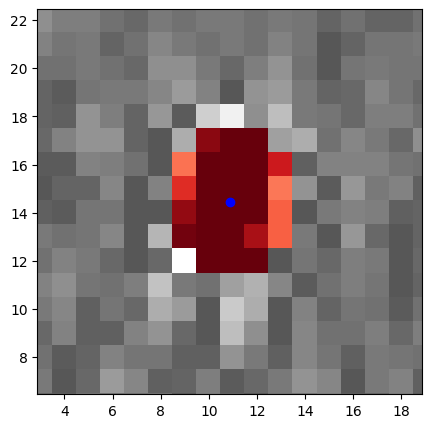

In [78]:
abertura = 2.8 #A melhor abertura

mask = np.sqrt((x - x0)**2 + (y - y0)**2) < abertura

image3_copy = np.copy(image3) #Puramente para ilustração
image3_copy[~mask] = np.nan  #Puramente para ilustração

fluxo=np.sum(image3[mask])

print('O fluxo da estrela calibradora é:',fluxo) #determinamos o fluxo da estrela aqui

pl.figure(figsize=[5, 5])
pl.imshow(image3, cmap='gray', vmin=image3.mean()-30, vmax=image3.mean()+30)
pl.imshow(image3_copy, cmap='Reds', alpha=1.0, vmin=image3.mean()-30, vmax=image3.mean()+30)
pl.plot(x0, y0, 'bo')
pl.xlim(x0-8, x0+8)
pl.ylim(y0-8, y0+8)
pl.show()